In [ ]:
!rm -rf sample_data

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
 from google.colab import files

 #retrieve uploaded file
 uploaded = files.upload()

Saving kaggle (1).json to kaggle (1).json


In [ ]:
 !cp kaggle.json ~/.kaggle/
 !chmod 600 ~/.kaggle/kaggle.json
 !ls ~/.kaggle

kaggle.json


In [ ]:
 !ls -l ~/.kaggle

total 4
-rw------- 1 root root 65 Jul 15 10:41 kaggle.json


In [ ]:
 !cat ~/.kaggle/kaggle.json

{"username":"kamliolfa","key":"8a79e474df65e53c4b87cf7d4b537c35"}

In [ ]:
!kaggle datasets list -s aptos2019-blindness-detection

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
sovitrath/diabetic-retinopathy-224x224-gaussian-filtered     Diabetic Retinopathy 224x224 Gaussian Filtered      427MB  2020-02-18 02:33:27           3275  
benjaminwarner/resized-2015-2019-blindness-detection-images  Resized 2015 & 2019 Blindness Detection Images       17GB  2019-07-03 04:01:09           4007  
ratthachat/efficientnet-keras-weights-b0b5                   EfficientNet Keras Weights B0-B5                    268MB  2019-07-17 04:07:46           2118  
sovitrath/diabetic-retinopathy-224x224-2019-data             Diabetic Retinopathy 224x224 (2019 Data)            238MB  2020-02-18 07:22:41            500  
sovitrath/diabetic-retinopathy-224x224-grayscale-images   

In [ ]:
!kaggle datasets download -d c7934597/resized-2015-2019-diabetic-retinopathy-detection

100% 17.3G/17.3G [06:49<00:00, 104MB/s] 
100% 17.3G/17.3G [06:49<00:00, 45.5MB/s]


In [ ]:
 #import os
 #for dirname, _, filenames in os.walk('/content'):
 #    for filename in filenames:
 #        print(os.path.join(dirname, filename))
 #print(len(os.getcwd()))

In [ ]:
!unzip resized-2015-2019-diabetic-retinopathy-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: resized_traintest15_train19/8549_left.jpg  
  inflating: resized_traintest15_train19/8549_right.jpg  
  inflating: resized_traintest15_train19/854_left.jpg  
  inflating: resized_traintest15_train19/854_right.jpg  
  inflating: resized_traintest15_train19/8550_left.jpg  
  inflating: resized_traintest15_train19/8550_right.jpg  
  inflating: resized_traintest15_train19/8551_left.jpg  
  inflating: resized_traintest15_train19/8551_right.jpg  
  inflating: resized_traintest15_train19/8552_left.jpg  
  inflating: resized_traintest15_train19/8552_right.jpg  
  inflating: resized_traintest15_train19/8553_left.jpg  
  inflating: resized_traintest15_train19/8553_right.jpg  
  inflating: resized_traintest15_train19/8554_left.jpg  
  inflating: resized_traintest15_train19/8554_right.jpg  
  inflating: resized_traintest15_train19/8555_left.jpg  
  inflating: resized_traintest15_train19/8555_right.jpg  
  inflating: resized_traintest1

In [ ]:
!rm resized-2015-2019-diabetic-retinopathy-detection.zip

In [ ]:
import os
print(len(os.listdir('/content/resized_test19')))
print(len(os.listdir('/content/labels')))
print(len(os.listdir('/content/resized_traintest15_train19')))

1928
5
92364


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
import pandas as pd
train_19_df = pd.read_csv("/content/labels/trainLabels19.csv")
test_19_df = pd.read_csv("/content/labels/testImages19.csv")
train_15_df = pd.read_csv("/content/labels/trainLabels15.csv")
test_15_df = pd.read_csv("/content/labels/testLabels15.csv")

test_19_df.head() 

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [ ]:
train_15_df.shape

(35126, 2)

In [ ]:
test_15_df.shape

(53576, 3)

In [ ]:
train_19_df.shape

(3662, 2)

In [ ]:
test_15_df.rename(index=str, columns={"image": "id_code", "level":"diagnosis"}, inplace=True)
train_15_df.rename(index=str, columns={"image": "id_code", "level":"diagnosis"}, inplace=True)
data_df = train_19_df.append([test_15_df.drop('Usage', axis=1), train_15_df], ignore_index = True)

In [ ]:
data_df.shape

(92364, 2)

In [ ]:
data_df.columns

Index(['id_code', 'diagnosis'], dtype='object')

In [ ]:
# find dark images
#def find_black_images(file_path, df):
#    """
#    Creates a column of images that are not black (np.mean(img) != 0)
#    INPUT
#        file_path: file_path to the images to be analyzed.
#        df: Pandas DataFrame that includes all labeled image names.
#        column: column in DataFrame query is evaluated against.
#    OUTPUT
#        Column indicating if the photo is pitch black or not.
#    """

#    lst_imgs = [l for l in df['id_code']]
#    return [1 if np.mean(np.array(Image.open(file_path + img + ".jpg"))) == 0 else 0 for img in lst_imgs]

In [ ]:
#import PIL
#from PIL import Image, ImageOps
#find_black_images("/content/resized_traintest15_train19/",data_df)

In [ ]:
data_df['file_path'] = data_df['id_code'].map(lambda x: os.path.join("/content/resized_traintest15_train19/",'{}.jpg'.format(x)))

In [ ]:
data_df['file_name'] = data_df["id_code"].apply(lambda x: x + ".jpg")
data_df.head(6)

,id_code,diagnosis,file_path,file_name
0,000c1434d8d7,2,/content/resized_traintest15_train19/000c1434d...,000c1434d8d7.jpg
1,001639a390f0,4,/content/resized_traintest15_train19/001639a39...,001639a390f0.jpg
2,0024cdab0c1e,1,/content/resized_traintest15_train19/0024cdab0...,0024cdab0c1e.jpg
3,002c21358ce6,0,/content/resized_traintest15_train19/002c21358...,002c21358ce6.jpg
4,005b95c28852,0,/content/resized_traintest15_train19/005b95c28...,005b95c28852.jpg
5,0083ee8054ee,4,/content/resized_traintest15_train19/0083ee805...,0083ee8054ee.jpg


In [ ]:
data_df['diagnosis'] = data_df['diagnosis'].astype(str)
data_df.head(6)

,id_code,diagnosis,file_path,file_name
0,000c1434d8d7,2,/content/resized_traintest15_train19/000c1434d...,000c1434d8d7.jpg
1,001639a390f0,4,/content/resized_traintest15_train19/001639a39...,001639a390f0.jpg
2,0024cdab0c1e,1,/content/resized_traintest15_train19/0024cdab0...,0024cdab0c1e.jpg
3,002c21358ce6,0,/content/resized_traintest15_train19/002c21358...,002c21358ce6.jpg
4,005b95c28852,0,/content/resized_traintest15_train19/005b95c28...,005b95c28852.jpg
5,0083ee8054ee,4,/content/resized_traintest15_train19/0083ee805...,0083ee8054ee.jpg


In [ ]:
data_df.shape

(92364, 4)

In [ ]:
data_df.to_csv("df_res_tvt.csv",index=False)

In [ ]:
import pandas as pd
df = pd.read_csv("df_res_tvt.csv", )

In [ ]:
df.shape

(92364, 4)

In [ ]:
# sklearn librairies..
from sklearn.model_selection import train_test_split
df_train_train,df_valid = train_test_split(data_df,test_size = 0.2)
df_train_valid,df_test = train_test_split(df_valid,test_size = 0.2)
print(df_train_train.shape,df_train_valid.shape,df_test.shape)

(73891, 4) (14778, 4) (3695, 4)


In [ ]:
def plot_classes(df,title):
    df_group = pd.DataFrame(df.groupby('diagnosis').agg('size').reset_index())
    df_group.columns = ['diagnosis','count']

    sns.set(rc={'figure.figsize':(10,5)}, style = 'whitegrid')
    sns.barplot(x = 'diagnosis',y='count',data = df_group)
    plt.title('Output Class Distribution ' + str(title))
    plt.show()

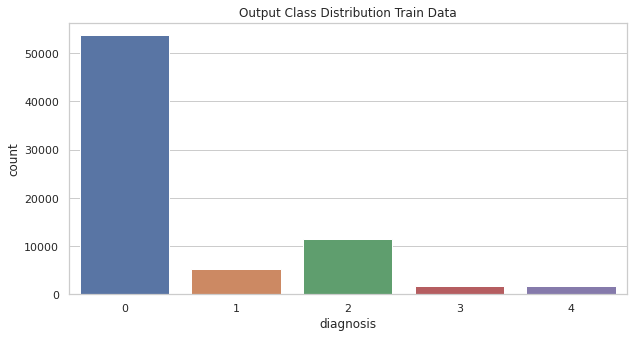

In [ ]:
# Visualization Librairies..
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["axes.grid"] = False

plot_classes(df_train_train,"Train Data")

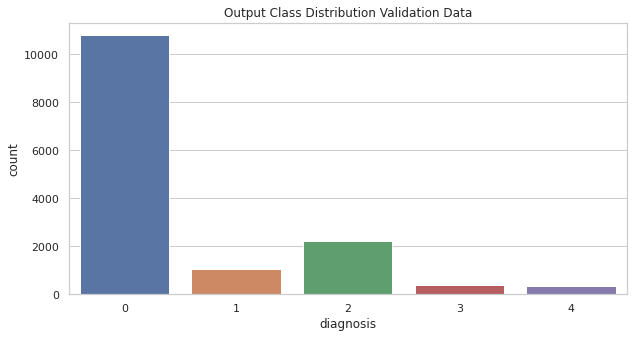

In [ ]:
plot_classes(df_train_valid,'Validation Data')


In [ ]:
#configure the matplot parameters:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = np.random.randint(low = 0,high = len(df_train_train) - 1)


In [ ]:
#Now, display a batch of 8 pictures. 
# Set up matplotlib fig, and size it to fit 4x4 pics


next_pic_pix = [os.path.join("/content/resized_traintest15_train19/", fname) 
                for fname in df_train_train.file_name[ pic_index:pic_index+8] 
               ]


In [ ]:
next_pic_pix

['/content/resized_traintest15_train19/2498_left.jpg',
 '/content/resized_traintest15_train19/23965_right.jpg',
 '/content/resized_traintest15_train19/1926_right.jpg',
 '/content/resized_traintest15_train19/41151_right.jpg',
 '/content/resized_traintest15_train19/37615_left.jpg',
 '/content/resized_traintest15_train19/7801_right.jpg',
 '/content/resized_traintest15_train19/3015_left.jpg',
 '/content/resized_traintest15_train19/22490_right.jpg']

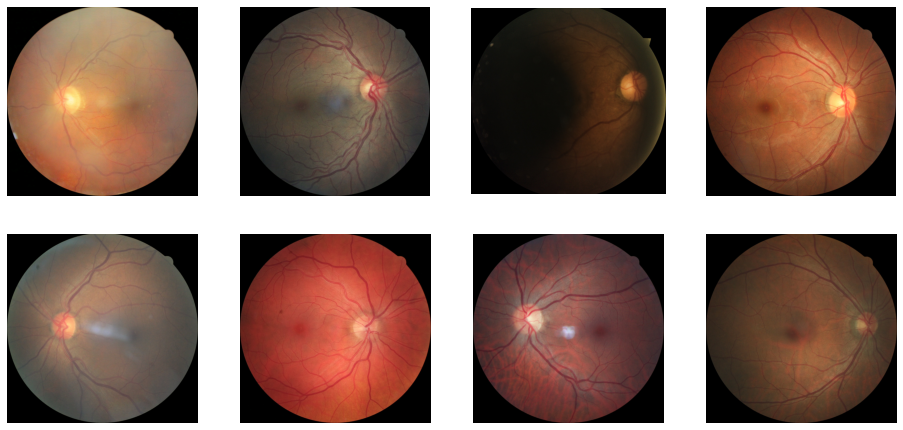

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
for i,img_path in enumerate(next_pic_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
#Obviously images do not have the same size 

from PIL import Image

for img_path in next_pic_pix:

  img = Image.open(img_path)

  print(img.size)

(1024, 1017)
(1023, 1019)
(1024, 982)
(1024, 1020)
(1024, 1019)
(1024, 1019)
(1024, 1019)
(1024, 1019)


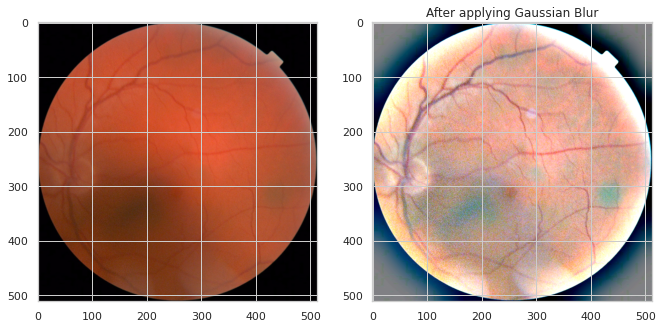

In [ ]:
'''
This section of code applies gaussian blur on top of image
'''
IMG_SIZE = 512
rn = np.random.randint(low = 0,high = len(df_train_train) - 1)

img = cv2.imread(df_train_train.file_path.iloc[rn])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

img_t = cv2.addWeighted(img,4, cv2.GaussianBlur(img , (0,0) , 30) ,-4 ,128)

f, axarr = plt.subplots(1,2,figsize = (11,11))
axarr[0].imshow(img)
axarr[1].imshow(img_t)
plt.title('After applying Gaussian Blur')
plt.show()

In [ ]:
from PIL import Image
import os, sys

path = "/content/resized_traintest15_train19/"
dirs = os.listdir( path )


def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            imResize = im.resize((512,512), Image.ANTIALIAS)
            imResize.save("/content/Final_resized_traintest15_train19/" +' resized.jpg', 'JPEG', quality=90)

resize()

KeyboardInterrupt: ignored

In [ ]:
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path)
            print("e:  ", e)
            print("f:  ", f)

NameError: ignored

In [ ]:
import os, sys 
f, e = os.path.splitext("/content/resized_traintest15_train19/")


In [ ]:
e

''

In [ ]:
'''Function loads an image from Folder , Resizes and saves in another directory '''

def image_resize_save(file):
    input_filepath = os.path.join("/content/resized_traintest15_train19/",'{}.jpg'.format(file))
    output_filepath = os.path.join("/content/resized_traintestV15_train19/",'{}.jpg'.format(file))
    img = cv2.imread(input_filepath)
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))


In [ ]:
y = image_resize_save(df_train_train.id_code.iloc[44])

In [ ]:
print(y)

None


In [ ]:
'''This Function uses Multi processing for faster saving of images into folder'''

def multiprocess_image_downloader(process:int, imgs:list):
    """
    Inputs:
        process: (int) number of process to run
        imgs:(list) list of images
    """
    print(f'MESSAGE: Running {process} process')
    results = map(image_resize_save, imgs)
    return results

In [ ]:
multiprocess_image_downloader(list(df_train_train.id_code.values),)

TypeError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255. ,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)


train_generator = train_datagen.flow_from_directory(df_train_train,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(512, 512))     

validation_generator =  test_datagen.flow_from_directory(df_train_valid,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (512, 512))